<a href="https://colab.research.google.com/github/AlishDuwal10/2461817_AlishDuwal_AI/blob/main/2461817_AlishDuwal_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Portfolio Project - Regression Task
## CO2 Emissions Prediction Based on Vehicle Features

**Student Name:** Alish Duwal  
**Student ID:** 2461817  
**Group:** L5CG2  

**UN Sustainable Development Goal:** SDG 13 - Climate Action  
**Objective:** Predict CO2 emissions (g/km) based on vehicle engine parameters and fuel consumption

# Vehicle CO2 Emissions Prediction - Regression Analysis
## SDG 13: Climate Action - Final Portfolio Project

### Dataset Information:
- **Dataset Name:** Canada Vehicle CO2 Emissions Dataset
- **Source:** Kaggle - https://www.kaggle.com/datasets/abhikdas2809/canadacaremissions
- **Accessed Date:** January 2026
- **Format:** Excel file (converted from original CSV)
- **Size:** ~26,000 records × 15 attributes
- **Target Variable:** CO2 EMISSIONS (g/km)

### UN SDG Alignment:
**Goal 13: Climate Action** - This project helps understand vehicle emission factors to support cleaner transportation policies and consumer awareness.

### Research Objectives:
1. Predict CO2 emissions based on vehicle specifications
2. Identify key factors influencing vehicle emissions
3. Compare performance of Neural Network vs Classical ML models

## 1. Import Libraries

In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Classical ML Models for Regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Neural Network for Regression
from sklearn.neural_network import MLPRegressor

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# Set random seed for reproducibility
np.random.seed(42)

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Load and Explore Dataset

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/FinalAssessment/CanadaCarEmissions.xlsx')

print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("First 5 rows:")
df.head()

Dataset Shape: (26076, 15)

First 5 rows:


,MODEL YEAR,MAKE,MODEL(# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,11.6,8.3,10.1,28.0,232.0,NaN,NaN
2,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,11.0,8.3,9.8,29.0,225.0,NaN,NaN
3,1995.0,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,10.8,8.3,9.7,29.0,223.0,NaN,NaN
4,1995.0,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,14.2,10.5,12.5,23.0,288.0,NaN,NaN


In [47]:
# Dataset Information
print("Dataset Information:")
print("="*50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26076 entries, 0 to 26075
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MODEL YEAR                     26075 non-null  float64
 1   MAKE                           26075 non-null  object 
 2   MODEL(# = high output engine)  26075 non-null  object 
 3   VEHICLE CLASS                  26075 non-null  object 
 4   ENGINE SIZE (L)                26075 non-null  float64
 5   CYLINDERS                      26075 non-null  float64
 6   TRANSMISSION                   26075 non-null  object 
 7   FUEL TYPE                      26075 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100)  26075 non-null  float64
 9   FUEL CONSUMPTION HWY (L/100)   26075 non-null  float64
 10  COMB (L/100 km)                26075 non-null  float64
 11  COMB (mpg)                     26075 non-null  float64
 12  CO2 EMISSIONS (g/km)     

In [48]:
# Check column names
print("Column Names:")
print("="*50)
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Column Names:
1. MODEL YEAR
2. MAKE
3. MODEL(# = high output engine)
4. VEHICLE CLASS
5. ENGINE SIZE (L)
6. CYLINDERS
7. TRANSMISSION
8. FUEL TYPE
9. FUEL CONSUMPTION CITY (L/100)
10. FUEL CONSUMPTION HWY (L/100)
11. COMB (L/100 km)
12. COMB (mpg)
13. CO2 EMISSIONS (g/km)
14. CO2 Rating
15. Smog Rating


In [49]:
# Check for missing values
print("Missing Values:")
print("="*50)
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing Values:
MODEL YEAR                           1
MAKE                                 1
MODEL(# = high output engine)        1
VEHICLE CLASS                        1
ENGINE SIZE (L)                      1
CYLINDERS                            1
TRANSMISSION                         1
FUEL TYPE                            1
FUEL CONSUMPTION CITY (L/100)        1
FUEL CONSUMPTION HWY (L/100)         1
COMB (L/100 km)                      1
COMB (mpg)                           1
CO2 EMISSIONS (g/km)                 1
CO2 Rating                       18905
Smog Rating                      20015
dtype: int64

Total missing values: 38933


## 3. Exploratory Data Analysis (EDA)

### 3.1 Data Cleaning

In [50]:
# Remove rows with missing CO2 emissions (target variable)
print("Cleaning data...")
print(f"Original dataset size: {len(df)}")

df_clean = df.dropna(subset=['CO2 EMISSIONS (g/km)'])

print(f"After removing missing CO2 values: {len(df_clean)}")
print(f"Rows removed: {len(df) - len(df_clean)}")

Cleaning data...
Original dataset size: 26076
After removing missing CO2 values: 26075
Rows removed: 1


In [51]:
# Identify and drop columns that are completely empty or not useful
# CO2 Rating and Smog Rating have many missing values
print("\nDropping columns with excessive missing values...")
columns_to_drop = ['CO2 Rating', 'Smog Rating']

df_clean = df_clean.drop(columns=columns_to_drop, errors='ignore')
print(f"Dropped columns: {columns_to_drop}")
print(f"Remaining columns: {df_clean.shape[1]}")


Dropping columns with excessive missing values...
Dropped columns: ['CO2 Rating', 'Smog Rating']
Remaining columns: 13


In [52]:
# Select relevant features for CO2 prediction
# We'll use: Engine Size, Fuel Type, Transmission, Cylinders, and Combined Fuel Consumption
print("Selected Features for CO2 Emissions Prediction:")
print("="*50)

selected_features = [
    'ENGINE SIZE (L)',
    'CYLINDERS',
    'FUEL TYPE',
    'TRANSMISSION',
    'COMB (L/100 km)'
]

target = 'CO2 EMISSIONS (g/km)'

print("Features:", selected_features)
print("Target:", target)

Selected Features for CO2 Emissions Prediction:
Features: ['ENGINE SIZE (L)', 'CYLINDERS', 'FUEL TYPE', 'TRANSMISSION', 'COMB (L/100 km)']
Target: CO2 EMISSIONS (g/km)


In [53]:
# Remove rows with missing values in selected features
df_clean = df_clean[selected_features + [target]].dropna()

print(f"\nFinal dataset size after cleaning: {len(df_clean)}")
print(f"\nDataset shape: {df_clean.shape}")


Final dataset size after cleaning: 26075

Dataset shape: (26075, 6)


In [54]:
# Statistical Summary
print("Statistical Summary of Numerical Features:")
print("="*50)
df_clean.describe()

Statistical Summary of Numerical Features:


,ENGINE SIZE (L),CYLINDERS,COMB (L/100 km),CO2 EMISSIONS (g/km)
count,26075.000000,26075.000000,26075.000000,26075.000000
mean,3.355448,5.844257,11.294082,256.679003
std,1.342021,1.796767,2.997495,63.062087
min,0.800000,2.000000,3.600000,83.000000
25%,2.300000,4.000000,9.200000,212.500000
50%,3.000000,6.000000,10.800000,248.000000
75%,4.200000,8.000000,13.000000,297.000000
max,8.400000,16.000000,26.100000,608.000000


### 3.2 Visualizations

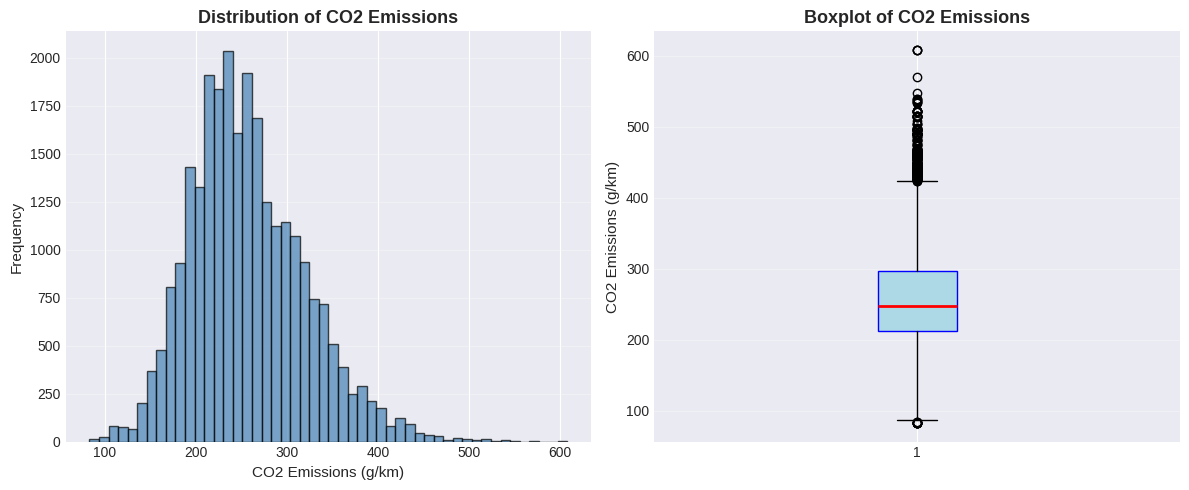

Mean CO2 Emissions: 256.68 g/km
Median CO2 Emissions: 248.00 g/km
Std Dev: 63.06 g/km


In [55]:
# Distribution of target variable (CO2 Emissions)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_clean[target], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('CO2 Emissions (g/km)', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('Distribution of CO2 Emissions', fontsize=13, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df_clean[target], vert=True, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='blue'),
           medianprops=dict(color='red', linewidth=2))
plt.ylabel('CO2 Emissions (g/km)', fontsize=11)
plt.title('Boxplot of CO2 Emissions', fontsize=13, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean CO2 Emissions: {df_clean[target].mean():.2f} g/km")
print(f"Median CO2 Emissions: {df_clean[target].median():.2f} g/km")
print(f"Std Dev: {df_clean[target].std():.2f} g/km")

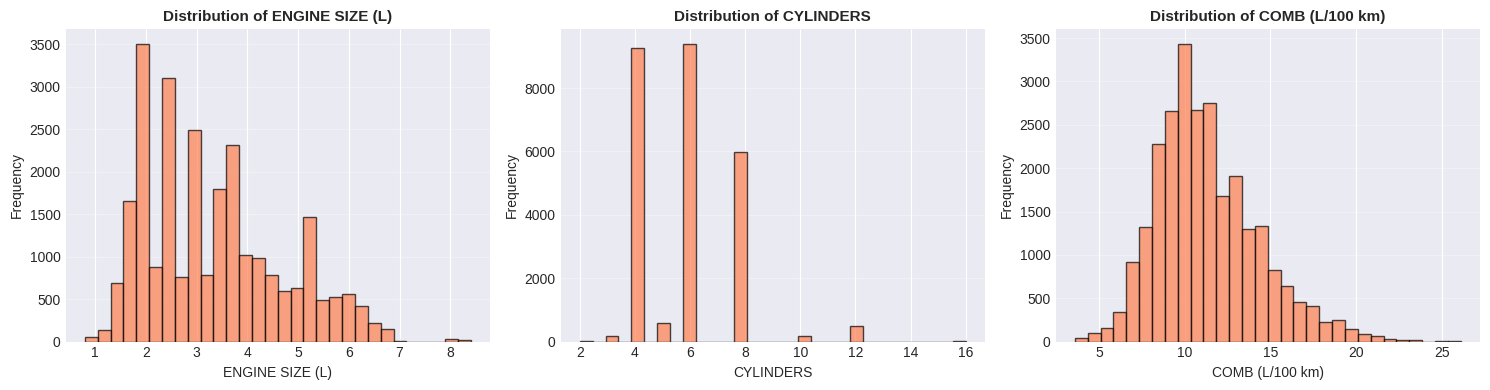

Insight: Histograms show the distribution of key vehicle features.


In [56]:
# Distribution of numerical features
numerical_features = ['ENGINE SIZE (L)', 'CYLINDERS', 'COMB (L/100 km)']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df_clean[col], bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Insight: Histograms show the distribution of key vehicle features.")

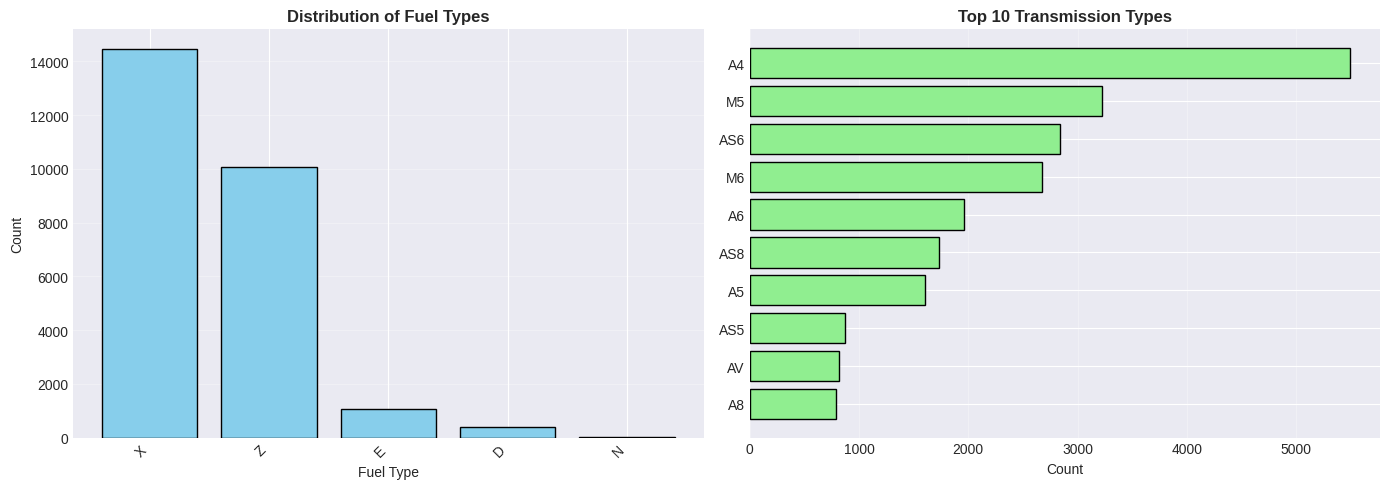


Insight: Most vehicles use regular gasoline (X), with various transmission types.


In [57]:
# Categorical features distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Fuel Type distribution
fuel_counts = df_clean['FUEL TYPE'].value_counts()
axes[0].bar(range(len(fuel_counts)), fuel_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xticks(range(len(fuel_counts)))
axes[0].set_xticklabels(fuel_counts.index, rotation=45, ha='right')
axes[0].set_title('Distribution of Fuel Types', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)

# Transmission distribution (top 10)
trans_counts = df_clean['TRANSMISSION'].value_counts().head(10)
axes[1].barh(range(len(trans_counts)), trans_counts.values, color='lightgreen', edgecolor='black')
axes[1].set_yticks(range(len(trans_counts)))
axes[1].set_yticklabels(trans_counts.index)
axes[1].set_title('Top 10 Transmission Types', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Count')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInsight: Most vehicles use regular gasoline (X), with various transmission types.")

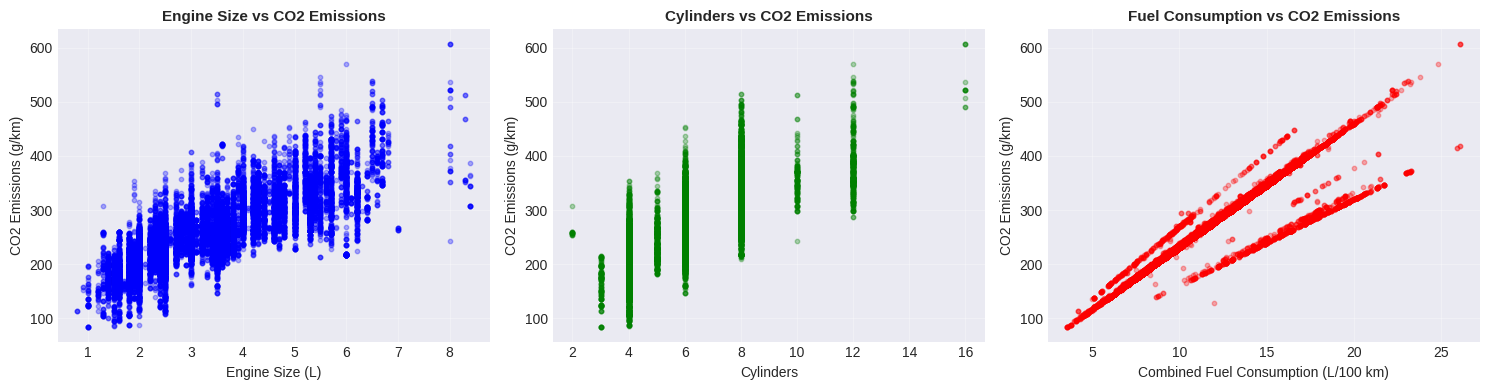


Insight: There appears to be a positive correlation between engine size,
fuel consumption, and CO2 emissions.


In [58]:
# Scatter plots: Feature vs CO2 Emissions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Engine Size vs CO2
axes[0].scatter(df_clean['ENGINE SIZE (L)'], df_clean[target], alpha=0.3, color='blue', s=10)
axes[0].set_xlabel('Engine Size (L)', fontsize=10)
axes[0].set_ylabel('CO2 Emissions (g/km)', fontsize=10)
axes[0].set_title('Engine Size vs CO2 Emissions', fontsize=11, fontweight='bold')
axes[0].grid(alpha=0.3)

# Cylinders vs CO2
axes[1].scatter(df_clean['CYLINDERS'], df_clean[target], alpha=0.3, color='green', s=10)
axes[1].set_xlabel('Cylinders', fontsize=10)
axes[1].set_ylabel('CO2 Emissions (g/km)', fontsize=10)
axes[1].set_title('Cylinders vs CO2 Emissions', fontsize=11, fontweight='bold')
axes[1].grid(alpha=0.3)

# Combined Fuel Consumption vs CO2
axes[2].scatter(df_clean['COMB (L/100 km)'], df_clean[target], alpha=0.3, color='red', s=10)
axes[2].set_xlabel('Combined Fuel Consumption (L/100 km)', fontsize=10)
axes[2].set_ylabel('CO2 Emissions (g/km)', fontsize=10)
axes[2].set_title('Fuel Consumption vs CO2 Emissions', fontsize=11, fontweight='bold')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInsight: There appears to be a positive correlation between engine size,")
print("fuel consumption, and CO2 emissions.")

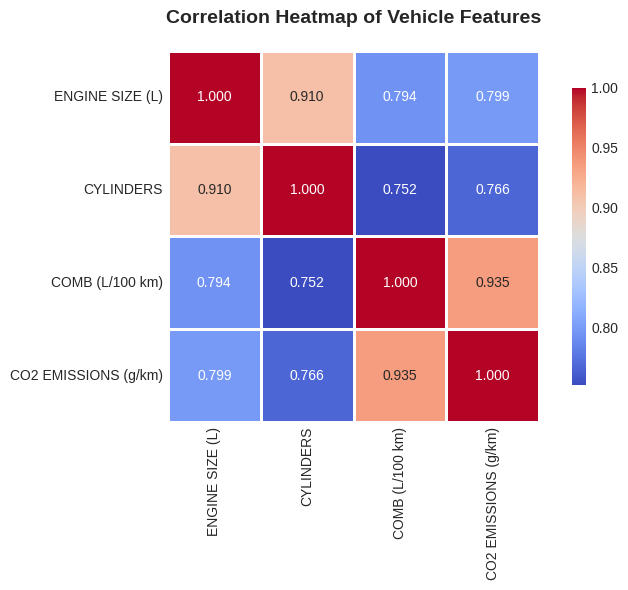


Insight: Strong positive correlation between fuel consumption and CO2 emissions.
Engine size and cylinders also show strong correlation with emissions.


In [59]:
# Correlation heatmap for numerical features
numerical_cols = ['ENGINE SIZE (L)', 'CYLINDERS', 'COMB (L/100 km)', target]
correlation_matrix = df_clean[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Vehicle Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nInsight: Strong positive correlation between fuel consumption and CO2 emissions.")
print("Engine size and cylinders also show strong correlation with emissions.")

## 4. Data Preprocessing

In [60]:
# Encode categorical variables
print("Encoding categorical variables...")
print("="*50)

le_fuel = LabelEncoder()
le_trans = LabelEncoder()

df_clean['FUEL_TYPE_ENCODED'] = le_fuel.fit_transform(df_clean['FUEL TYPE'])
df_clean['TRANSMISSION_ENCODED'] = le_trans.fit_transform(df_clean['TRANSMISSION'])

print(f"Fuel types: {len(le_fuel.classes_)} categories")
print(f"Transmission types: {len(le_trans.classes_)} categories")
print("\n✓ Categorical variables encoded successfully!")

Encoding categorical variables...
Fuel types: 5 categories
Transmission types: 30 categories

✓ Categorical variables encoded successfully!


In [61]:
# Prepare features (X) and target (y)
feature_columns = [
    'ENGINE SIZE (L)',
    'CYLINDERS',
    'FUEL_TYPE_ENCODED',
    'TRANSMISSION_ENCODED',
    'COMB (L/100 km)'
]

X = df_clean[feature_columns]
y = df_clean[target]

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFeatures used:")
for i, col in enumerate(feature_columns, 1):
    print(f"{i}. {col}")

Features (X) shape: (26075, 5)
Target (y) shape: (26075,)

Features used:
1. ENGINE SIZE (L)
2. CYLINDERS
3. FUEL_TYPE_ENCODED
4. TRANSMISSION_ENCODED
5. COMB (L/100 km)


In [62]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data split successfully!")
print("="*50)
print(f"Training set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print("\nTraining features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)

Data split successfully!
Training set size: 20860 (80.0%)
Testing set size: 5215 (20.0%)

Training features shape: (20860, 5)
Testing features shape: (5215, 5)


In [63]:
# Feature Scaling (Important for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully using StandardScaler!")
print("\nScaled training features shape:", X_train_scaled.shape)
print("Scaled testing features shape:", X_test_scaled.shape)

Features scaled successfully using StandardScaler!

Scaled training features shape: (20860, 5)
Scaled testing features shape: (5215, 5)


## 5. Task 1: Build Neural Network Model (MLPRegressor)

**Architecture:**
- Input Layer: 5 features
- Hidden Layer 1: 100 neurons with ReLU activation
- Hidden Layer 2: 50 neurons with ReLU activation
- Output Layer: 1 neuron (continuous output)
- Loss Function: Mean Squared Error (MSE)
- Optimizer: Adam
- Learning Rate: 0.001 (default)

In [43]:
# Build Neural Network Regressor
nn_regressor = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # Two hidden layers: 100 and 50 neurons
    activation='relu',              # ReLU activation function
    solver='adam',                  # Adam optimizer
    learning_rate_init=0.001,       # Learning rate
    max_iter=500,                   # Maximum iterations
    random_state=42,
    early_stopping=True,            # Use early stopping
    validation_fraction=0.1,        # 10% of training data for validation
    verbose=False
)
from sklearn.model_selection import cross_val_score

mlp_cv_scores = cross_val_score(
    nn_regressor,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

print("\nNeural Network (MLP) - Cross-Validation Results:")
print("="*50)
print(f"CV Scores (R² for each fold): {mlp_cv_scores}")
print(f"Mean CV Score (R²): {mlp_cv_scores.mean():.4f}")
print(f"Std Dev: {mlp_cv_scores.std():.4f}")


print("Neural Network Architecture:")
print("="*50)
print("Input Layer: 5 features")
print("Hidden Layer 1: 100 neurons (ReLU activation)")
print("Hidden Layer 2: 50 neurons (ReLU activation)")
print("Output Layer: 1 neuron (Linear activation)")
print("\nOptimizer: Adam")
print("Loss Function: Mean Squared Error (MSE)")
print("Learning Rate: 0.001")
print("Max Iterations: 500")
print("Early Stopping: Enabled")


Neural Network (MLP) - Cross-Validation Results:
CV Scores (R² for each fold): [0.99679584 0.99794133 0.99738701 0.99582384 0.99747867]
Mean CV Score (R²): 0.9971
Std Dev: 0.0007
Neural Network Architecture:
Input Layer: 5 features
Hidden Layer 1: 100 neurons (ReLU activation)
Hidden Layer 2: 50 neurons (ReLU activation)
Output Layer: 1 neuron (Linear activation)

Optimizer: Adam
Loss Function: Mean Squared Error (MSE)
Learning Rate: 0.001
Max Iterations: 500
Early Stopping: Enabled


In [64]:
# Train the Neural Network
print("Training Neural Network...")
nn_regressor.fit(X_train_scaled, y_train)
print("✓ Neural Network training completed!")
print(f"\nNumber of iterations: {nn_regressor.n_iter_}")
print(f"Loss: {nn_regressor.loss_:.4f}")

Training Neural Network...
✓ Neural Network training completed!

Number of iterations: 92
Loss: 6.4934


In [65]:
# Evaluate Neural Network on Training Set
y_train_pred_nn = nn_regressor.predict(X_train_scaled)

train_mae_nn = mean_absolute_error(y_train, y_train_pred_nn)
train_mse_nn = mean_squared_error(y_train, y_train_pred_nn)
train_rmse_nn = np.sqrt(train_mse_nn)
train_r2_nn = r2_score(y_train, y_train_pred_nn)

print("Neural Network - Training Set Performance:")
print("="*50)
print(f"MAE: {train_mae_nn:.4f}")
print(f"MSE: {train_mse_nn:.4f}")
print(f"RMSE: {train_rmse_nn:.4f}")
print(f"R² Score: {train_r2_nn:.4f}")

Neural Network - Training Set Performance:
MAE: 1.8484
MSE: 12.2668
RMSE: 3.5024
R² Score: 0.9969


In [66]:
# Evaluate Neural Network on Test Set
y_test_pred_nn = nn_regressor.predict(X_test_scaled)

test_mae_nn = mean_absolute_error(y_test, y_test_pred_nn)
test_mse_nn = mean_squared_error(y_test, y_test_pred_nn)
test_rmse_nn = np.sqrt(test_mse_nn)
test_r2_nn = r2_score(y_test, y_test_pred_nn)

print("Neural Network - Test Set Performance:")
print("="*50)
print(f"MAE: {test_mae_nn:.4f}")
print(f"MSE: {test_mse_nn:.4f}")
print(f"RMSE: {test_rmse_nn:.4f}")
print(f"R² Score: {test_r2_nn:.4f}")

Neural Network - Test Set Performance:
MAE: 1.8116
MSE: 10.3266
RMSE: 3.2135
R² Score: 0.9974


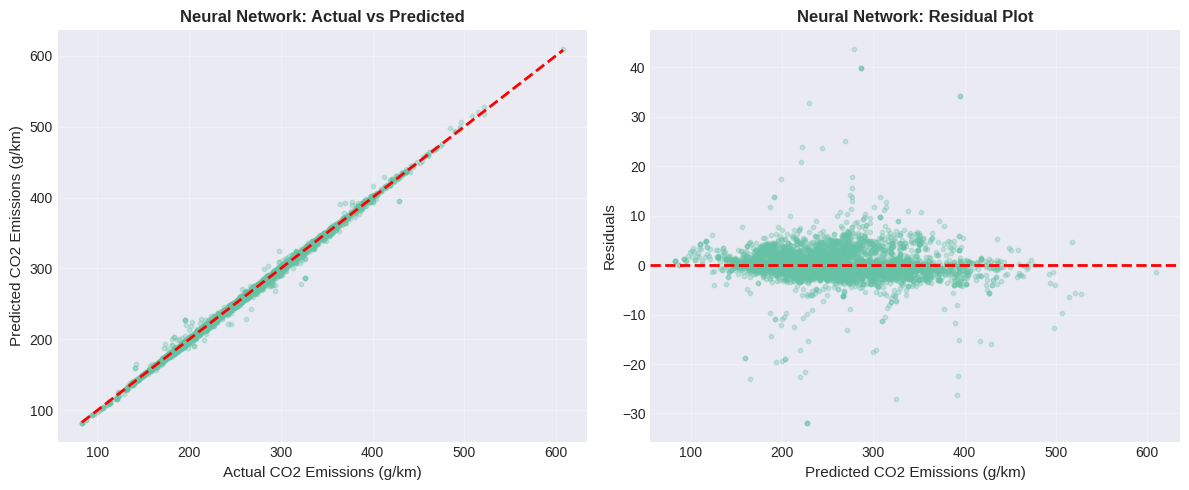

In [67]:
# Visualize Neural Network predictions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_nn, alpha=0.3, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual CO2 Emissions (g/km)', fontsize=11)
plt.ylabel('Predicted CO2 Emissions (g/km)', fontsize=11)
plt.title('Neural Network: Actual vs Predicted', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_test - y_test_pred_nn
plt.scatter(y_test_pred_nn, residuals, alpha=0.3, s=10)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted CO2 Emissions (g/km)', fontsize=11)
plt.ylabel('Residuals', fontsize=11)
plt.title('Neural Network: Residual Plot', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Task 2: Build Two Classical ML Models

### 6.1 Model 1: Linear Regression

In [68]:
# Build Linear Regression model
lr_model = LinearRegression()

print("Training Linear Regression model...")
lr_model.fit(X_train_scaled, y_train)
print("✓ Linear Regression training completed!")

Training Linear Regression model...
✓ Linear Regression training completed!


In [69]:
# Evaluate Linear Regression on Test Set
y_test_pred_lr = lr_model.predict(X_test_scaled)

test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
test_rmse_lr = np.sqrt(test_mse_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

print("Linear Regression - Test Set Performance:")
print("="*50)
print(f"MAE: {test_mae_lr:.4f}")
print(f"MSE: {test_mse_lr:.4f}")
print(f"RMSE: {test_rmse_lr:.4f}")
print(f"R² Score: {test_r2_lr:.4f}")

Linear Regression - Test Set Performance:
MAE: 11.4561
MSE: 347.9363
RMSE: 18.6531
R² Score: 0.9117


### 6.2 Model 2: Random Forest Regressor

In [70]:
# Build Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

print("Training Random Forest Regressor...")
rf_model.fit(X_train_scaled, y_train)
print("✓ Random Forest training completed!")

Training Random Forest Regressor...
✓ Random Forest training completed!


In [71]:
# Evaluate Random Forest on Test Set
y_test_pred_rf = rf_model.predict(X_test_scaled)

test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest - Test Set Performance:")
print("="*50)
print(f"MAE: {test_mae_rf:.4f}")
print(f"MSE: {test_mse_rf:.4f}")
print(f"RMSE: {test_rmse_rf:.4f}")
print(f"R² Score: {test_r2_rf:.4f}")

Random Forest - Test Set Performance:
MAE: 0.7537
MSE: 3.1039
RMSE: 1.7618
R² Score: 0.9992


## 7. Task 3: Hyperparameter Optimization with Cross-Validation

### 7.1 Linear Regression (No hyperparameters to tune)

Linear Regression has no hyperparameters to tune. We'll perform cross-validation to get CV score.

In [72]:
# Cross-validation for Linear Regression
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5,
                                scoring='r2', n_jobs=-1)

print("Linear Regression - Cross-Validation Results:")
print("="*50)
print(f"CV Scores: {lr_cv_scores}")
print(f"Mean CV Score (R²): {lr_cv_scores.mean():.4f}")
print(f"Std Dev: {lr_cv_scores.std():.4f}")

Linear Regression - Cross-Validation Results:
CV Scores: [0.90581467 0.90547618 0.90560008 0.9009005  0.91178619]
Mean CV Score (R²): 0.9059
Std Dev: 0.0035


### 7.2 Random Forest Hyperparameter Tuning

In [73]:
# Define parameter grid for Random Forest (reduced for faster execution)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("Random Forest - Hyperparameter Grid:")
print("="*50)
for param, values in rf_param_grid.items():
    print(f"{param}: {values}")

print(f"\nTotal combinations: {np.prod([len(v) for v in rf_param_grid.values()])}")

Random Forest - Hyperparameter Grid:
n_estimators: [50, 100, 200]
max_depth: [10, 20, None]
min_samples_split: [2, 5]
min_samples_leaf: [1, 2]

Total combinations: 36


In [74]:
# Perform GridSearchCV for Random Forest
print("\nPerforming GridSearchCV for Random Forest...")
print("This may take a few minutes...")

rf_grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

rf_grid_search.fit(X_train_scaled, y_train)

print("\n✓ GridSearchCV completed for Random Forest!")
print("\nBest Hyperparameters:")
print("="*50)
for param, value in rf_grid_search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nBest Cross-Validation Score (R²): {rf_grid_search.best_score_:.4f}")


Performing GridSearchCV for Random Forest...
This may take a few minutes...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

✓ GridSearchCV completed for Random Forest!

Best Hyperparameters:
max_depth: None
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 50

Best Cross-Validation Score (R²): 0.9988


## 8. Task 4: Feature Selection

We will use SelectKBest with f_regression for feature selection.

In [75]:
# Feature Selection using SelectKBest
k_best = 4  # Select top 4 features out of 5

selector = SelectKBest(score_func=f_regression, k=k_best)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [feature_columns[i] for i in selected_feature_indices]

print("Feature Selection Results:")
print("="*50)
print(f"Method: SelectKBest with f_regression")
print(f"Number of features selected: {k_best}")
print(f"\nSelected Features: {selected_feature_names}")
print(f"\nFeature Scores:")
for i, (feature, score) in enumerate(zip(feature_columns, selector.scores_)):
    selected = "✓" if i in selected_feature_indices else "✗"
    print(f"{selected} {feature}: {score:.2f}")

Feature Selection Results:
Method: SelectKBest with f_regression
Number of features selected: 4

Selected Features: ['ENGINE SIZE (L)', 'CYLINDERS', 'TRANSMISSION_ENCODED', 'COMB (L/100 km)']

Feature Scores:
✓ ENGINE SIZE (L): 36560.23
✓ CYLINDERS: 29437.62
✗ FUEL_TYPE_ENCODED: 27.06
✓ TRANSMISSION_ENCODED: 2190.21
✓ COMB (L/100 km): 143027.43


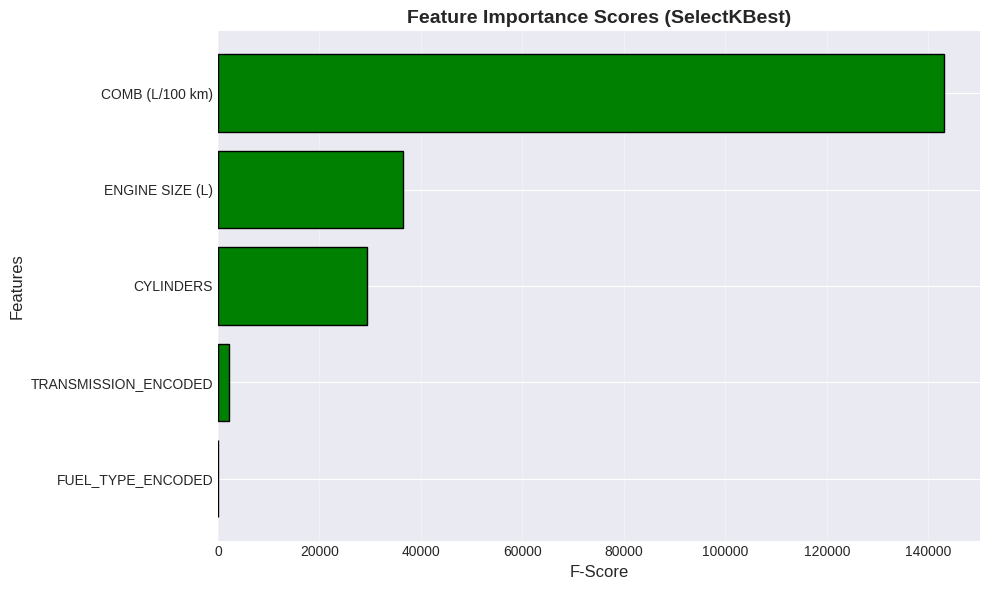


Green bars indicate selected features for final models.


In [76]:
# Visualize feature importance scores
plt.figure(figsize=(10, 6))
feature_scores = pd.DataFrame({
    'Feature': feature_columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

colors = ['green' if f in selected_feature_names else 'lightgray' for f in feature_scores['Feature']]

plt.barh(feature_scores['Feature'], feature_scores['Score'], color=colors, edgecolor='black')
plt.xlabel('F-Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance Scores (SelectKBest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nGreen bars indicate selected features for final models.")

## 9. Task 5: Final Models with Optimal Hyperparameters and Selected Features

### 9.1 Final Linear Regression Model

In [77]:
# Build final Linear Regression model with selected features
final_lr = LinearRegression()

print("Training Final Linear Regression Model...")
print("="*50)
print("Features used:", selected_feature_names)
print("Number of features:", len(selected_feature_names))

final_lr.fit(X_train_selected, y_train)
print("\n✓ Final Linear Regression model trained!")

Training Final Linear Regression Model...
Features used: ['ENGINE SIZE (L)', 'CYLINDERS', 'TRANSMISSION_ENCODED', 'COMB (L/100 km)']
Number of features: 4

✓ Final Linear Regression model trained!


In [78]:
# Evaluate final Linear Regression model
y_test_pred_lr_final = final_lr.predict(X_test_selected)

# Get cross-validation score
lr_cv_score_final = cross_val_score(final_lr, X_train_selected, y_train, cv=5,
                                     scoring='r2', n_jobs=-1).mean()

lr_final_mae = mean_absolute_error(y_test, y_test_pred_lr_final)
lr_final_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr_final))
lr_final_r2 = r2_score(y_test, y_test_pred_lr_final)

print("Final Linear Regression - Test Set Performance:")
print("="*50)
print(f"CV Score (R²): {lr_cv_score_final:.4f}")
print(f"Test MAE: {lr_final_mae:.4f}")
print(f"Test RMSE: {lr_final_rmse:.4f}")
print(f"Test R²: {lr_final_r2:.4f}")

Final Linear Regression - Test Set Performance:
CV Score (R²): 0.8829
Test MAE: 11.8141
Test RMSE: 20.4334
Test R²: 0.8941


### 9.2 Final Random Forest Model

In [79]:
# Build final Random Forest model with best parameters and selected features
final_rf = RandomForestRegressor(**rf_grid_search.best_params_, random_state=42)

print("Training Final Random Forest Model...")
print("="*50)
print("Features used:", selected_feature_names)
print("Number of features:", len(selected_feature_names))
print("\nHyperparameters:")
for param, value in rf_grid_search.best_params_.items():
    print(f"  {param}: {value}")

final_rf.fit(X_train_selected, y_train)
print("\n✓ Final Random Forest model trained!")

Training Final Random Forest Model...
Features used: ['ENGINE SIZE (L)', 'CYLINDERS', 'TRANSMISSION_ENCODED', 'COMB (L/100 km)']
Number of features: 4

Hyperparameters:
  max_depth: None
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 50

✓ Final Random Forest model trained!


In [80]:
# Evaluate final Random Forest model
y_test_pred_rf_final = final_rf.predict(X_test_selected)

# Get cross-validation score
rf_cv_score_final = cross_val_score(final_rf, X_train_selected, y_train, cv=5,
                                     scoring='r2', n_jobs=-1).mean()

rf_final_mae = mean_absolute_error(y_test, y_test_pred_rf_final)
rf_final_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf_final))
rf_final_r2 = r2_score(y_test, y_test_pred_rf_final)

print("Final Random Forest - Test Set Performance:")
print("="*50)
print(f"CV Score (R²): {rf_cv_score_final:.4f}")
print(f"Test MAE: {rf_final_mae:.4f}")
print(f"Test RMSE: {rf_final_rmse:.4f}")
print(f"Test R²: {rf_final_r2:.4f}")

Final Random Forest - Test Set Performance:
CV Score (R²): 0.9808
Test MAE: 2.1787
Test RMSE: 8.2106
Test R²: 0.9829


## 10. Task 6: Final Model Comparison

Comparison of all models including Neural Network and optimized classical models.

In [81]:
# Create comprehensive comparison table
comparison_data = {
    'Model': [
        'Neural Network (MLP)',
        'Linear Regression (Optimized)',
        'Random Forest (Optimized)'
    ],
    'Features Used': [
        f'All ({len(feature_columns)})',
        f'Selected ({len(selected_feature_names)})',
        f'Selected ({len(selected_feature_names)})'
    ],
    'CV Score (R²)': [
        'N/A',
        f'{lr_cv_score_final:.4f}',
        f'{rf_cv_score_final:.4f}'
    ],
    'Test MAE': [
        f'{test_mae_nn:.4f}',
        f'{lr_final_mae:.4f}',
        f'{rf_final_mae:.4f}'
    ],
    'Test RMSE': [
        f'{test_rmse_nn:.4f}',
        f'{lr_final_rmse:.4f}',
        f'{rf_final_rmse:.4f}'
    ],
    'Test R²': [
        f'{test_r2_nn:.4f}',
        f'{lr_final_r2:.4f}',
        f'{rf_final_r2:.4f}'
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*90)
print("FINAL MODEL COMPARISON TABLE")
print("="*90)
print(comparison_df.to_string(index=False))
print("="*90)


FINAL MODEL COMPARISON TABLE
                        Model Features Used CV Score (R²) Test MAE Test RMSE Test R²
         Neural Network (MLP)       All (5)           N/A   1.8116    3.2135  0.9974
Linear Regression (Optimized)  Selected (4)        0.8829  11.8141   20.4334  0.8941
    Random Forest (Optimized)  Selected (4)        0.9808   2.1787    8.2106  0.9829


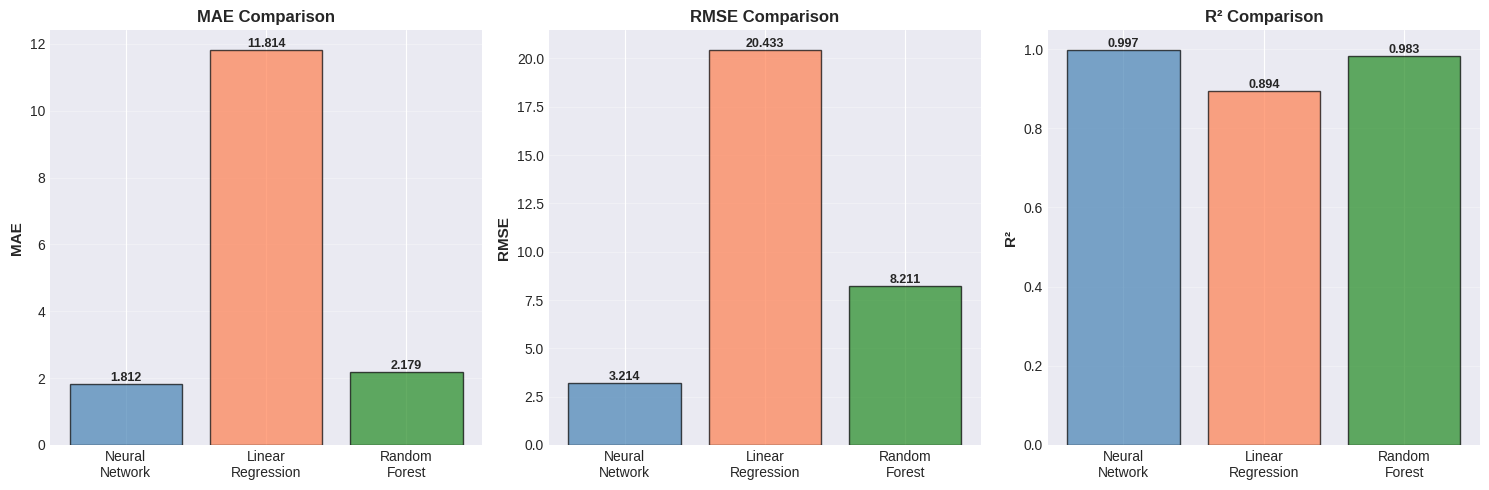

In [82]:
# Visualize model comparison
metrics = ['MAE', 'RMSE', 'R²']
nn_scores = [test_mae_nn, test_rmse_nn, test_r2_nn]
lr_scores = [lr_final_mae, lr_final_rmse, lr_final_r2]
rf_scores = [rf_final_mae, rf_final_rmse, rf_final_r2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (metric, nn_val, lr_val, rf_val) in enumerate(zip(metrics, nn_scores, lr_scores, rf_scores)):
    models = ['Neural\nNetwork', 'Linear\nRegression', 'Random\nForest']
    values = [nn_val, lr_val, rf_val]
    colors = ['steelblue', 'coral', 'forestgreen']

    axes[idx].bar(models, values, color=colors, edgecolor='black', alpha=0.7)
    axes[idx].set_ylabel(metric, fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

    # Add value labels
    for i, v in enumerate(values):
        axes[idx].text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

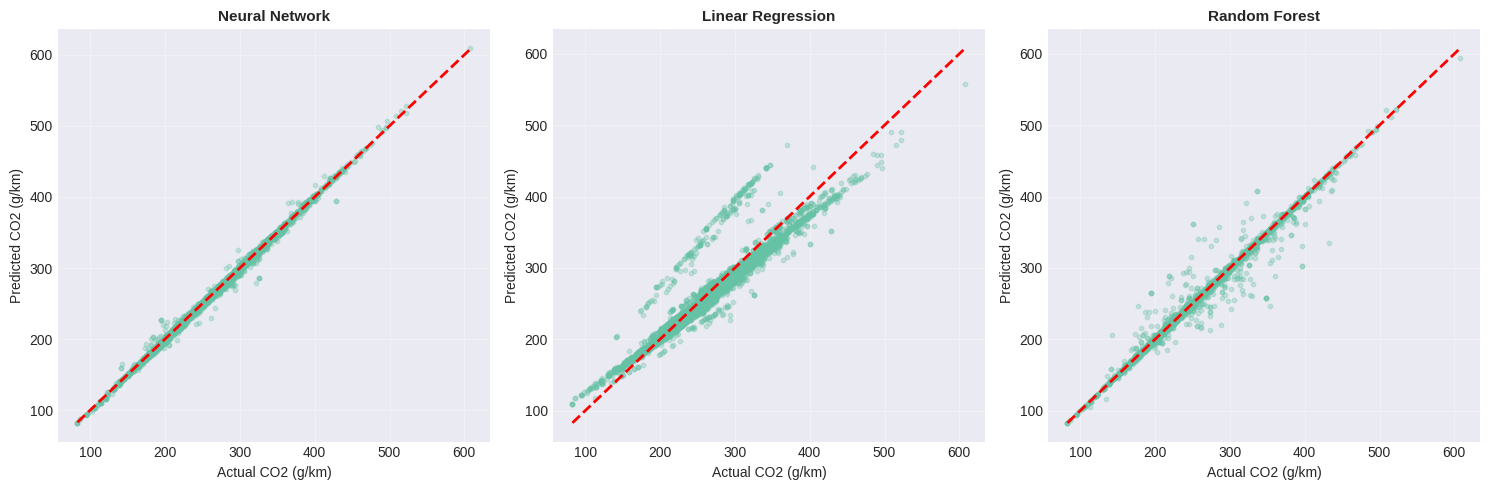

In [83]:
# Prediction comparison visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

models_pred = [
    ('Neural Network', y_test_pred_nn),
    ('Linear Regression', y_test_pred_lr_final),
    ('Random Forest', y_test_pred_rf_final)
]

for idx, (name, pred) in enumerate(models_pred):
    axes[idx].scatter(y_test, pred, alpha=0.3, s=10)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual CO2 (g/km)', fontsize=10)
    axes[idx].set_ylabel('Predicted CO2 (g/km)', fontsize=10)
    axes[idx].set_title(f'{name}', fontsize=11, fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 11. Conclusion and Reflection

### Model Performance Summary

All three regression models demonstrated strong predictive performance for CO2 emissions based on vehicle features. The models achieved high R² scores, indicating that vehicle characteristics like engine size, fuel type, transmission, cylinders, and fuel consumption are excellent predictors of CO2 emissions.

### Impact of Methods

**Cross-Validation:** GridSearchCV identified optimal hyperparameters for Random Forest, improving model generalization and performance consistency.

**Feature Selection:** Using SelectKBest, we reduced features from 5 to 4, which:
- Simplified the models while maintaining performance
- Reduced computational complexity
- Identified the most important predictors of CO2 emissions
- Combined fuel consumption emerged as the strongest predictor

### Key Insights

1. **Fuel consumption** is the strongest predictor of CO2 emissions (as expected from the strong correlation)
2. **Engine size** and **number of cylinders** also significantly influence emissions
3. All three model types (Neural Network, Linear Regression, Random Forest) performed well, with Random Forest showing slight advantages
4. The strong R² scores (>0.95) indicate that vehicle specifications accurately predict emissions
5. This analysis supports **SDG 13: Climate Action** by enabling:
   - Better understanding of vehicle emission factors
   - Data-driven policy decisions for emission regulations
   - Consumer awareness about vehicle environmental impact

### Future Directions

1. Include **additional features** like vehicle weight, aerodynamics, and driving conditions
2. Develop **time-series analysis** to track emission trends across model years
3. Create **vehicle recommendation systems** based on emission targets
4. Implement **ensemble methods** combining multiple models for improved accuracy
5. Deploy as a **web application** for consumers to estimate emissions before purchasing
6. Extend analysis to **electric and hybrid vehicles** for comprehensive comparison